In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import pylab
from denoiser import Denoiser

In [36]:
def to_mono(audio):
    if len(audio.shape) == 1:
        return audio
    else:
        return np.mean(audio, axis=1)

In [37]:
noise_sample, noise_sr = sf.read('noise_sample.wav')
noise_sample_mono = to_mono(noise_sample)
audio_wav, audio_sr = sf.read('noisy_audio.wav')
audio_wav_mono = to_mono(audio_wav)
assert noise_sr == audio_sr, "Sample rates do not match!"

In [38]:
denoiser = Denoiser(thr=1.0, red_rate=1.1)

denoiser.fit(noise_sample_mono)

In [39]:
audio_denoised = denoiser(audio_wav_mono)
audio_denoised = audio_denoised.detach().numpy()

In [40]:
sf.write('denoised_audio.wav', audio_denoised, audio_sr)

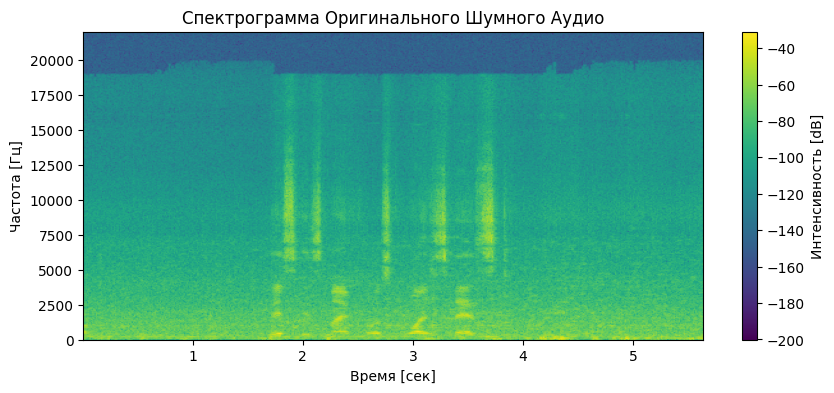

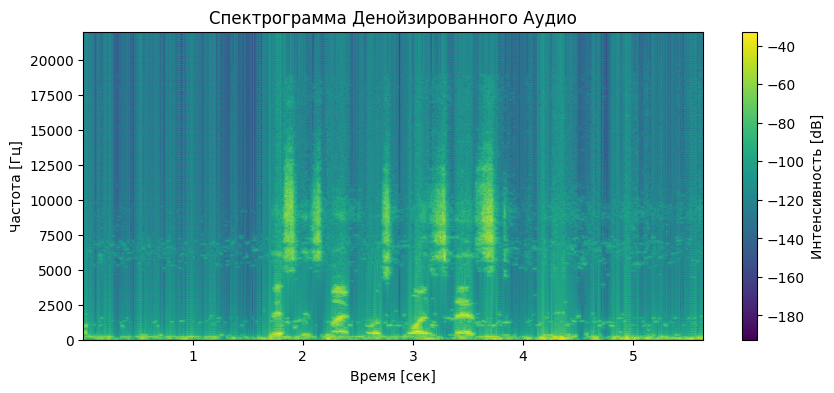

In [41]:
def plot_spectrogram(signal, sample_rate, title):
    plt.figure(figsize=(10, 4))
    plt.specgram(signal, NFFT=1024, Fs=sample_rate, noverlap=512, cmap='viridis')
    plt.title(title)
    plt.xlabel('Время [сек]')
    plt.ylabel('Частота [Гц]')
    plt.colorbar(label='Интенсивность [dB]')
    plt.show()

plot_spectrogram(audio_wav_mono, audio_sr, 'Спектрограмма Оригинального Шумного Аудио')

plot_spectrogram(audio_denoised, audio_sr, 'Спектрограмма Денойзированного Аудио')


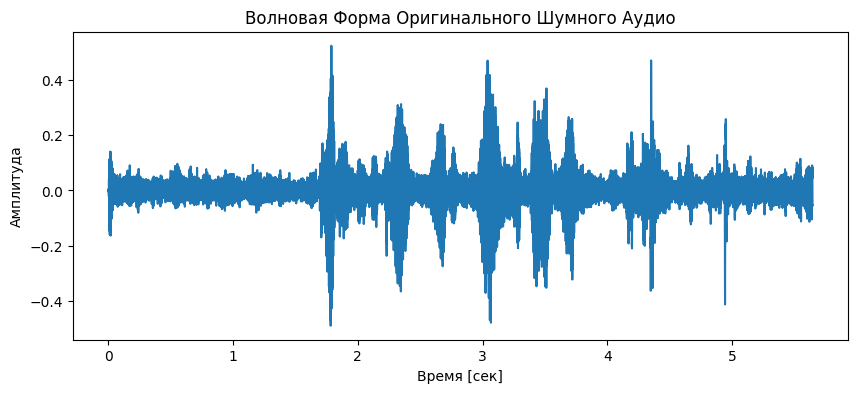

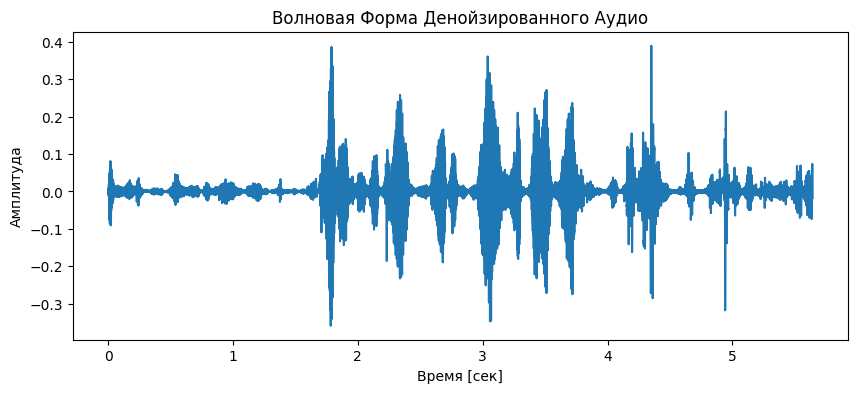

In [42]:
def plot_waveform(signal, sample_rate, title):
    times = np.arange(len(signal)) / float(sample_rate)
    plt.figure(figsize=(10, 4))
    plt.plot(times, signal)
    plt.title(title)
    plt.xlabel('Время [сек]')
    plt.ylabel('Амплитуда')
    plt.show()

plot_waveform(audio_wav_mono, audio_sr, 'Волновая Форма Оригинального Шумного Аудио')

plot_waveform(audio_denoised, audio_sr, 'Волновая Форма Денойзированного Аудио')
